In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from future.builtins import range
rc('text', usetex=True)
plt.rc('font', family='serif')

from IPython.html.widgets import interact

import dimensionize_sedov

3.086000000004005e+18


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
filename = 'fluid.adiabatic'
ext = 'c'

In [6]:
%%bash -s "$filename" "$ext"
echo running: $1.$2
make
./$1 >& 2

running: fluid.adiabatic.c
gcc -O2 -c fluid.adiabatic.c -lm
gcc -O2 -o fluid.adiabatic fluid.adiabatic.o -lm


fluid.adiabatic.c: In function ‘main’:
fluid.adiabatic.c:143:14: warning: ignoring return value of ‘scanf’, declared with attribute warn_unused_result [-Wunused-result]
         scanf("%d", &tmp);
              ^
fluid.adiabatic.c:147:14: warning: ignoring return value of ‘scanf’, declared with attribute warn_unused_result [-Wunused-result]
         scanf("%d", &tmp);
              ^
fluid.adiabatic.c:162:14: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
         fgets(buffer, sizeof(buffer), in_file_pointer); // skip headers
              ^
fluid.adiabatic.c:163:15: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
         fscanf(in_file_pointer,"%lf \n", &time_current);
               ^
fluid.adiabatic.c:165:14: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
         fgets(buffer, sizeof(buffer), in_file_pointer); /

In [37]:
%%bash -s "$filename"
echo running without compiling: $1
./$1 >&2

running without compiling: fluid.adiabatic


In [ ]:
%%bash
make clean

### things to do:
    - Add a plot of t and delta_t on the side

In [2]:
#data_filename = 'saved_results/sedov_E_nonconservative/velos'
#info_filename = 'saved_results/sedov_E_nonconservative/info'
data_filename = 'velos'
info_filename = 'info'
pc = 3.0856e18  # parsec in [cm]
M_solar = 2e33  # solar mass in [g]
yr = 3.154e7    # year in [s]

gamma = 5/3

k, i, R, u, rho, T, Mass, c_ad, E, P, Q = np.loadtxt(data_filename, unpack=True, skiprows=1)
k_info, E_tot_info, E_grav_info, E_kin_info, E_int_info, M_tot_info, delta_time_info, time_total_info = np.loadtxt(info_filename, unpack=True, skiprows=1)

# SHOULD BE OVERWRITTEN IF THINGS ARE DONE PROPERLY:
sedov = dimensionize_sedov.main(time_total_info[0])
r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov


zones = (max(i) +1)
lines = k.size
n_timesteps= lines / zones


k2d    = k.reshape(   (lines/zones,zones))
i2d    = i.reshape(   (lines/zones,zones))
R2d    = R.reshape(   (lines/zones,zones))
u2d    = u.reshape(   (lines/zones,zones))
rho2d  = rho.reshape( (lines/zones,zones))
T2d    = T.reshape(   (lines/zones,zones))
Mass2d = Mass.reshape((lines/zones,zones))
c_ad2d = c_ad.reshape((lines/zones,zones))
E2d    = E.reshape(   (lines/zones,zones))
P2d    = P.reshape(   (lines/zones,zones))

s2d    = np.log(P2d / np.power(rho2d,gamma)) # specific entropy, in arbitrary units

i_boundaries = np.where(i2d[1,:]%2)[0]
i_zones      = np.where(i2d[1,:]%2-1)[0]

time_max = max(k2d[:,0])
time_min = min(k2d[:,0])
timestep_jump = (time_max - time_min) / (n_timesteps - 1)
timestep_dict = dict(zip(k2d[:,0], range(int(n_timesteps))))

i     = i2d[0]
Mass  = Mass2d[0]
M_int = np.zeros(Mass.shape)
for j in range(3,int(zones)-1,2):
    M_int[j] = M_int[j-2] + Mass[j]

3.086e+18


//anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in log
//anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: invalid value encountered in log


9.3320549777e+18
current time:  261.771429341  years
energy conserved to:  6.74638352336e-05


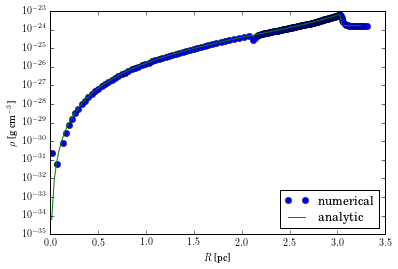

In [3]:
## PLOT RESULTS
    

def plot_T_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_zones[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], T2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc, T2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
        if with_sedov is True:
            plt.plot(r_sedov / pc, T_sedov)
            plt.legend((r"numerical", r"analytic"), loc="lower right")
    plt.ylabel(r"$T$ [K]")
    
def plot_u_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_boundaries[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], u2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc, u2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
        if with_sedov is True:
            plt.plot(r_sedov / pc, u_sedov, marker="")
            plt.legend((r"numerical", r"analytic"), loc="lower right")
    plt.ylabel(r"$u$ [cm s$^{-1}$]")
    ymin, ymax = plt.ylim()   # return the current ylim
    plt.ylim([ymax * 1e-15, ymax])

def plot_R_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_boundaries[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], R2d[timestep_dict[t], i_plot] / pc, marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc, R2d[timestep_dict[t], i_plot] / pc, marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
    plt.ylabel(r"$R$ [pc]")


def plot_E_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_zones[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], E2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc, E2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
        if with_sedov is True:
            plt.plot(r_sedov / pc, E_sedov)
            plt.legend((r"numerical", r"analytic"), loc="lower right")
    plt.ylabel(r"$E_\mathrm{int}$ [erg g$^{-1}$]")

def plot_rho_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_zones[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], rho2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc, rho2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
        if with_sedov is True:
            plt.plot(r_sedov / pc, rho_sedov)
            plt.legend((r"numerical", r"analytic"), loc="lower right")
    plt.ylabel(r"$\rho$ [g cm$^{-3}$]")
#    plt.ylim([1e-19, 1e-15])

def plot_P_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_zones[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], P2d[timestep_dict[t],i_plot], marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc, P2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
        if with_sedov is True:
            plt.plot(r_sedov / pc, P_sedov)
            plt.legend((r"numerical", r"analytic"), loc="lower right")
    plt.ylabel(r"$P$ [dyne cm$^{-2}$]")
    
def plot_s_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_zones[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], s2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc, s2d[timestep_dict[t], i_plot], marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
        if with_sedov is True:
            plt.plot(r_sedov / pc, s_sedov)
            plt.legend((r"numerical", r"analytic"), loc="lower right")
    plt.ylabel(r"$s$ [arbitrary units]")


def plot_Mass_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_zones[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], Mass[i_plot] / M_solar, marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc,
                    Mass[i_plot] / M_solar, marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
    plt.ylabel(r"$M$ [$M_\odot$]")
    
    
def plot_M_int_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_boundaries[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[i_plot], M_int[i_plot] / M_solar, marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc,
                    M_int[i_plot] / M_solar, marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]")
    plt.ylabel(r"$M_{int}$ [$M_\odot$]")
    
def plot_ExM_graph(t, x_axis, sedov, with_sedov):
    i_plot = i_zones[1:]
    r_sedov, u_sedov, rho_sedov, T_sedov, c_ad_sedov, E_sedov, P_sedov, s_sedov, mass_sedov = sedov
    if x_axis is True:
        plt.plot(i[1:], E2d[timestep_dict[t], i_plot] * Mass[i_plot], marker="o", linestyle="")
        plt.xlabel(r"zone")
    else:
        plt.plot(R2d[timestep_dict[t], i_plot] / pc, 
                    E2d[timestep_dict[t], i_plot] * Mass[i_plot], marker="o", linestyle="")
        plt.xlabel(r"$R$ [pc]") 
    plt.ylabel(r"$E \cdot M$ [erg]")
    
def plot_graphs(t=0, plot_variable=plot_rho_graph, x_axis=True, y_axis=True, with_sedov=True):
    sedov = dimensionize_sedov.main(time_total_info[timestep_dict[t]])
    plt.xscale('linear')
    if y_axis is True:
        plt.yscale('log')
    else:
        plt.yscale('linear')
    plot_variable(t, x_axis, sedov, with_sedov)
    print("current time: ", time_total_info[timestep_dict[t]] / yr, " years")
    print("energy conserved to: ", (E_tot_info[timestep_dict[t]] / E_tot_info[0] -1))


interact(plot_graphs,
    plot_variable={'T':plot_T_graph, 'u':plot_u_graph, 
                   'R':plot_R_graph, 
#                   'Mach':plot_mach_graph,
                   'E':plot_E_graph, 'E * M': plot_ExM_graph,
                   'rho':plot_rho_graph, 
                   'P':plot_P_graph, 's':plot_s_graph,
                   "Mass":plot_Mass_graph, "M_int":plot_M_int_graph},
    x_axis={'zones':True, 'R':False},
    y_axis={'log':True, 'linear':False},
    with_sedov = True,
    t=(time_min,time_max, timestep_jump));

